In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
# Results_folder='results'
Results_folder='Backup_weights_and_dicts'

### Accuracy comparison

In [8]:
import pickle

def get_dict(path):
    with open(path, "rb") as f:
        d = pickle.load(f)
        f.close()
    return d

epochs = 20
lrs = [1e-3, 1e-5]
descriptions = ["vanilla","noisy"] # can add "class_imbalance_noisy" / "class_imbalance according to train"
common_path = f"{Results_folder}/training/"

for lr in lrs:
    for d in descriptions:

        print(f"Results for VGG with lr={lr} in the {d} setting")
        vgg_res = get_dict(common_path + f"VGG_{epochs}_epochs_{lr}_lr_{d}.pkl")
        val_acc = vgg_res["validation_accuracy"][-1]
        t_time = sum(vgg_res["training_time"])
        print(f"Validation accuracy : {val_acc}, Total Training time : {t_time}")

        print(f"Results for Resnet with lr={lr} in the {d} setting")
        resnet_res = get_dict(common_path + f"ResNet_{epochs}_epochs_{lr}_lr_{d}.pkl")
        val_acc = resnet_res["validation_accuracy"][-1]
        t_time = sum(resnet_res["training_time"])
        print(f"Validation accuracy : {val_acc}, Total Training time : {t_time}")

        print(f"Results for Unet not pretrained with lr={lr} in the {d} setting")
        unet_res = get_dict(common_path + f"UNet_{epochs}_epochs_{lr}_lr_{d}no_pretraining.pkl")
        val_acc = unet_res["validation_accuracy"][-1]
        t_time = sum(unet_res["training_time"])
        print(f"Validation accuracy : {val_acc}, Total Training time : {t_time}")

        print(f"Results for Unet pretrained with lr={lr} in the {d} setting")
        unet_res = get_dict(common_path + f"UNet_{epochs}_epochs_{lr}_lr_{d}_pretrained_resnet.pkl")
        val_acc = unet_res["validation_accuracy"][-1]
        t_time = sum(unet_res["training_time"])
        print(f"Validation accuracy : {val_acc}, Total Training time : {t_time}")

        print(f"Results for VAE with lr={lr} in the {d} setting")
        vae_gen_res = get_dict(common_path + f"VAE_{epochs}_epochs_{lr}_lr_{d}_generation.pkl")
        t_time_gen = sum(vae_gen_res["training_time"])
        svm_res = get_dict(common_path + f"VAE_{epochs}_epochs_{lr}_lr_{d}.pkl")
        svm_accuracy = svm_res["validation_accuracy"][-1]
        svm_time = sum(svm_res["training_time"])
        kmeans_res = get_dict(common_path + f"VAE_{d}_kmeans.pkl")
        kmeans_accuracy = kmeans_res["validation_accuracy"][-1]
        kmeans_time = kmeans_res["training_time"][-1]
        print(f"With SVM : Validation accuracy : {svm_accuracy}, Total Training time : {t_time_gen + svm_time}")
        print(f"With KMeans : Validation accuracy : {kmeans_accuracy}, Total Training time : {t_time_gen + kmeans_time}")

Results for VGG with lr=0.001 in the vanilla setting
Validation accuracy : 99.90543735224587, Total Training time : 1000.8084547519684
Results for Resnet with lr=0.001 in the vanilla setting
Validation accuracy : 99.95271867612293, Total Training time : 1060.9025559425354
Results for Unet not pretrained with lr=0.001 in the vanilla setting
Validation accuracy : 100.0, Total Training time : 1620.3165636062622
Results for Unet pretrained with lr=0.001 in the vanilla setting
Validation accuracy : 99.95271867612293, Total Training time : 1459.544401884079
Results for VAE with lr=0.001 in the vanilla setting
With SVM : Validation accuracy : 98.15602836879432, Total Training time : 381.656391620636
With KMeans : Validation accuracy : 0.9508274231678487, Total Training time : 256.94016551971436
Results for VGG with lr=0.001 in the noisy setting
Validation accuracy : 93.61702127659575, Total Training time : 1336.7015900611877
Results for Resnet with lr=0.001 in the noisy setting
Validation acc

### Training behaviors

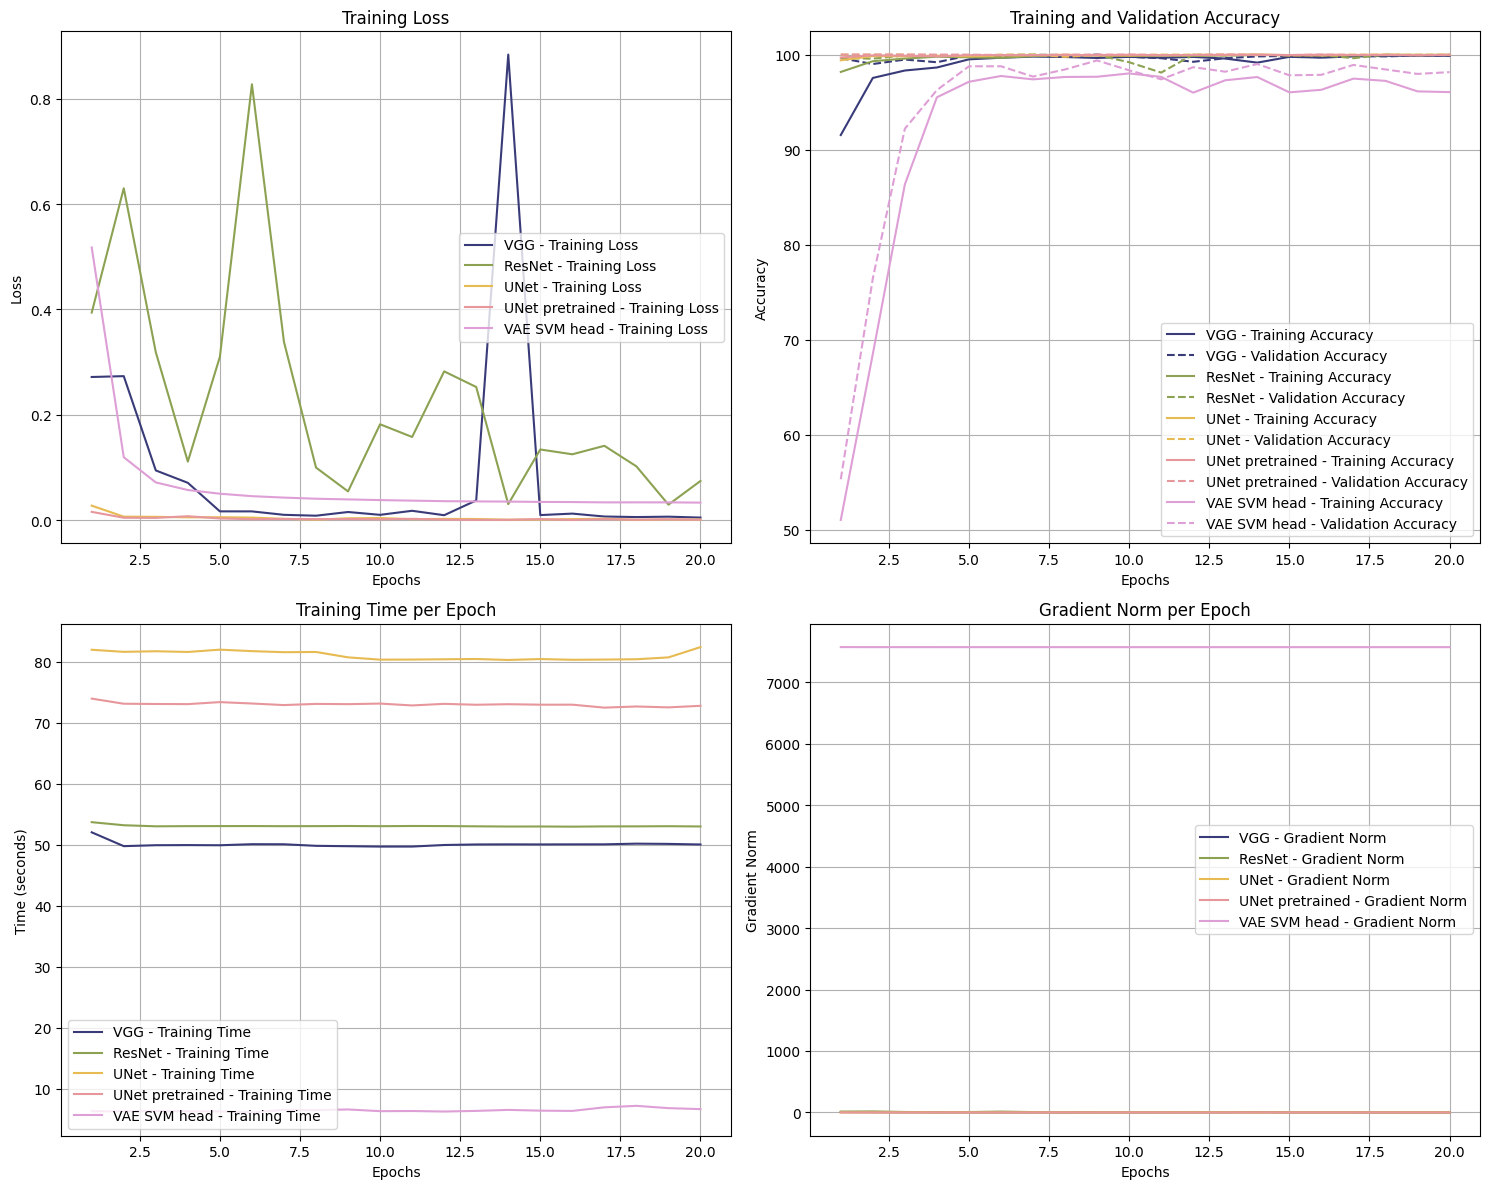

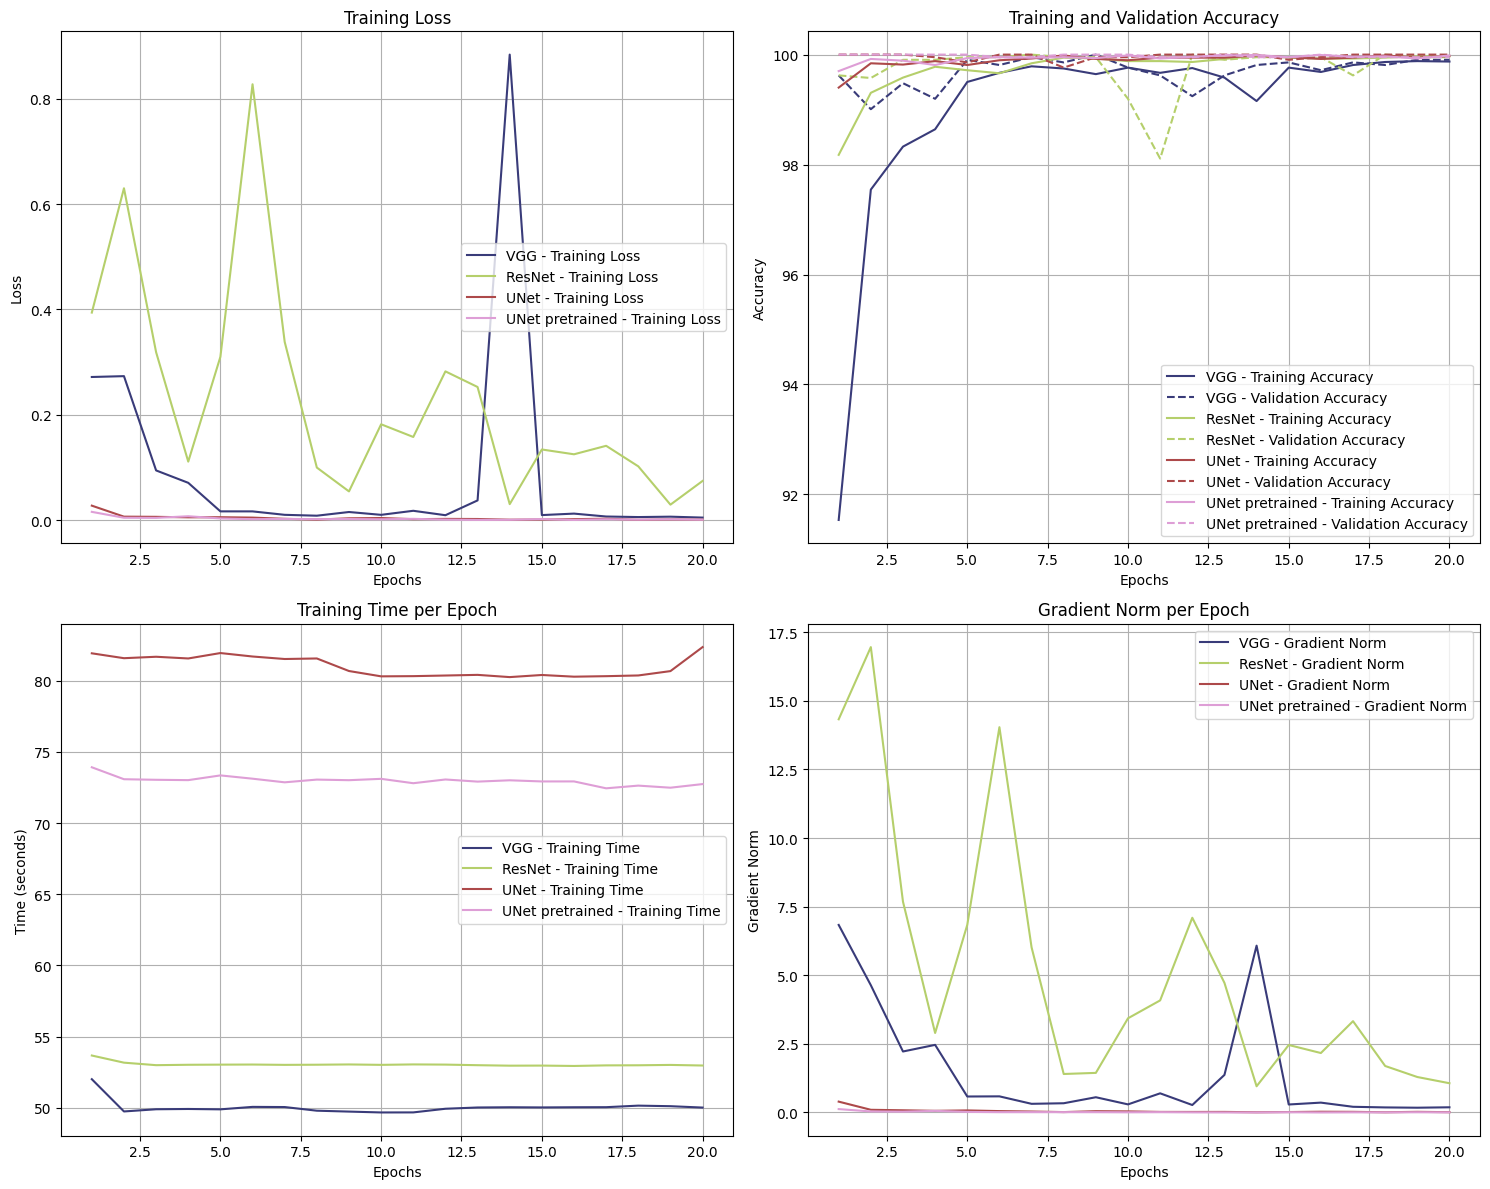

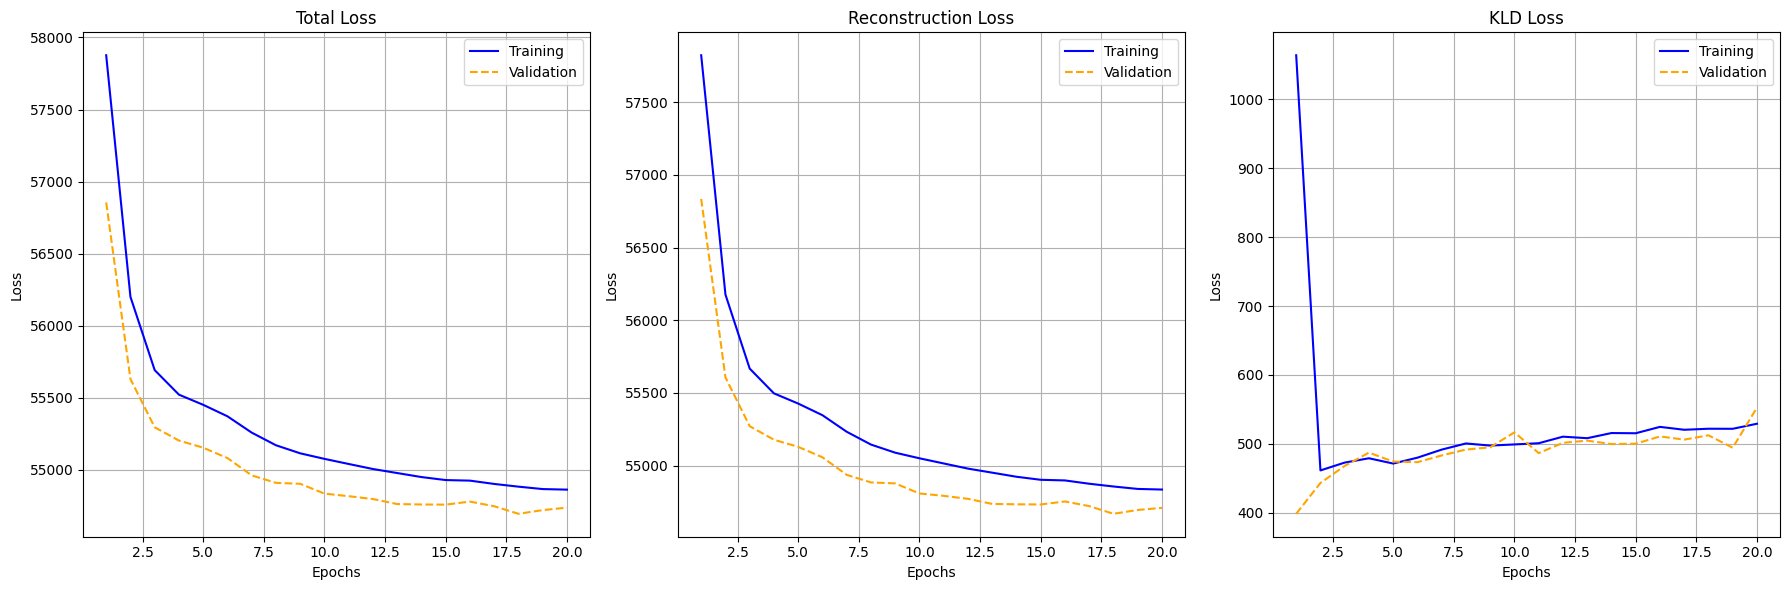

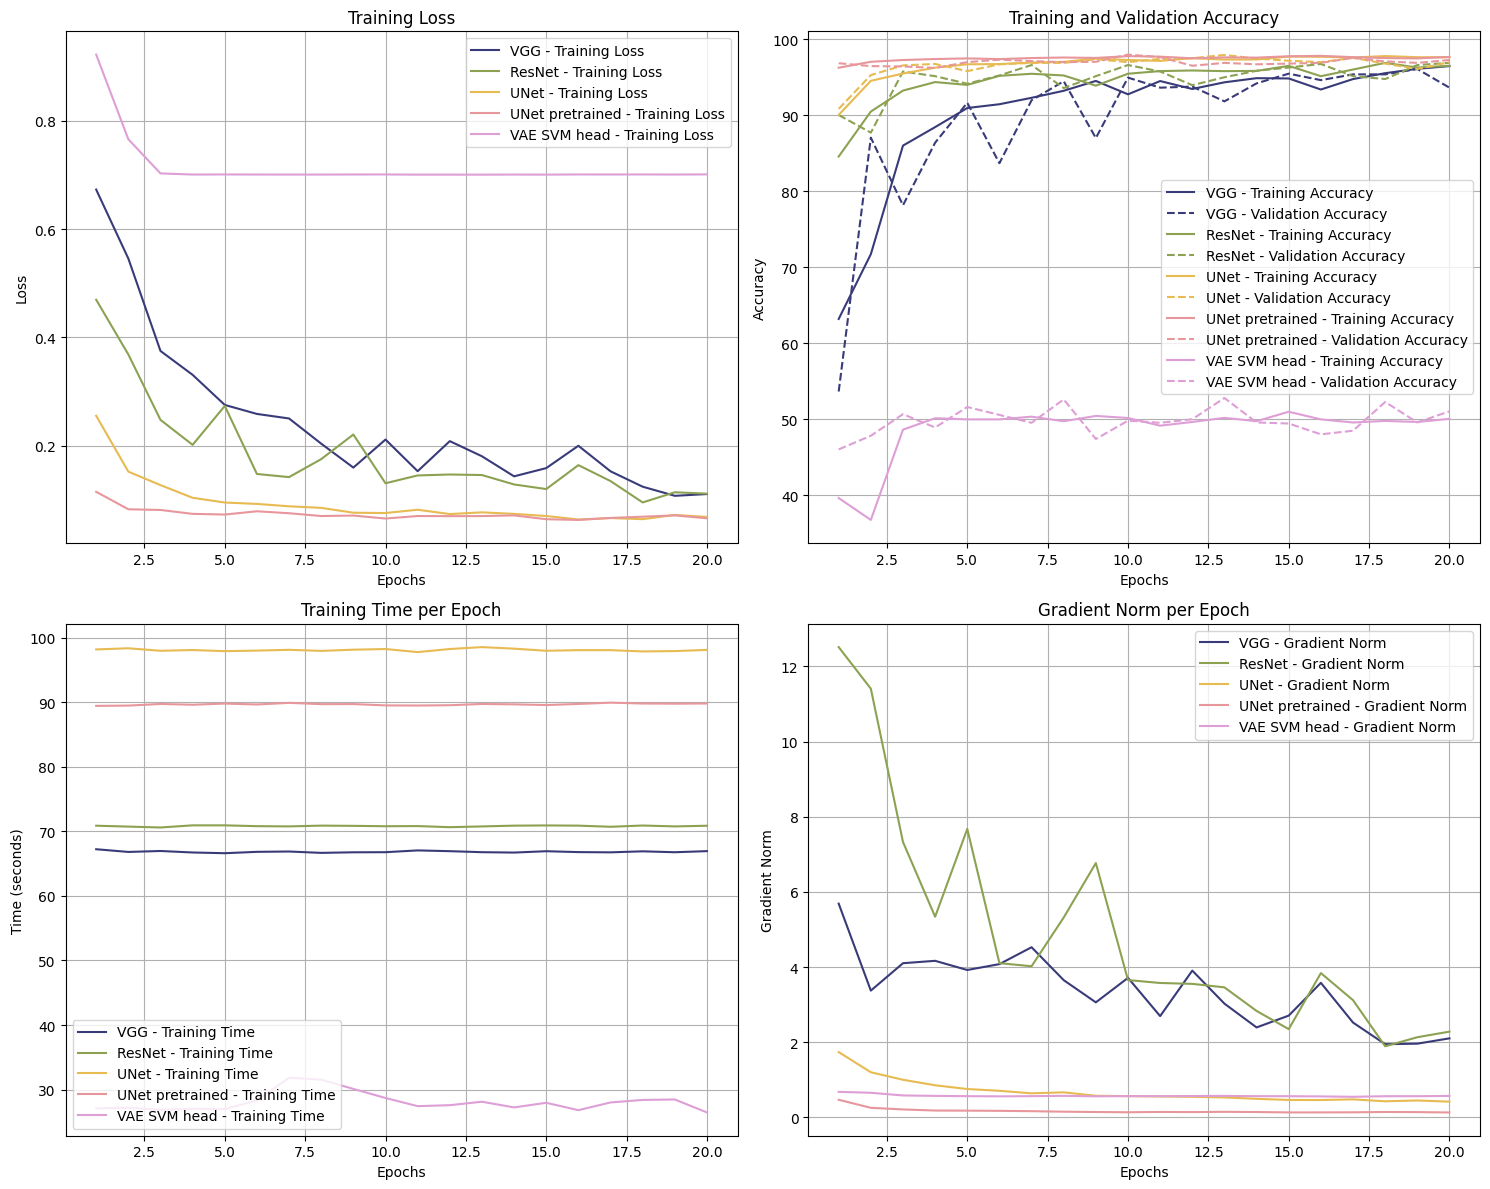

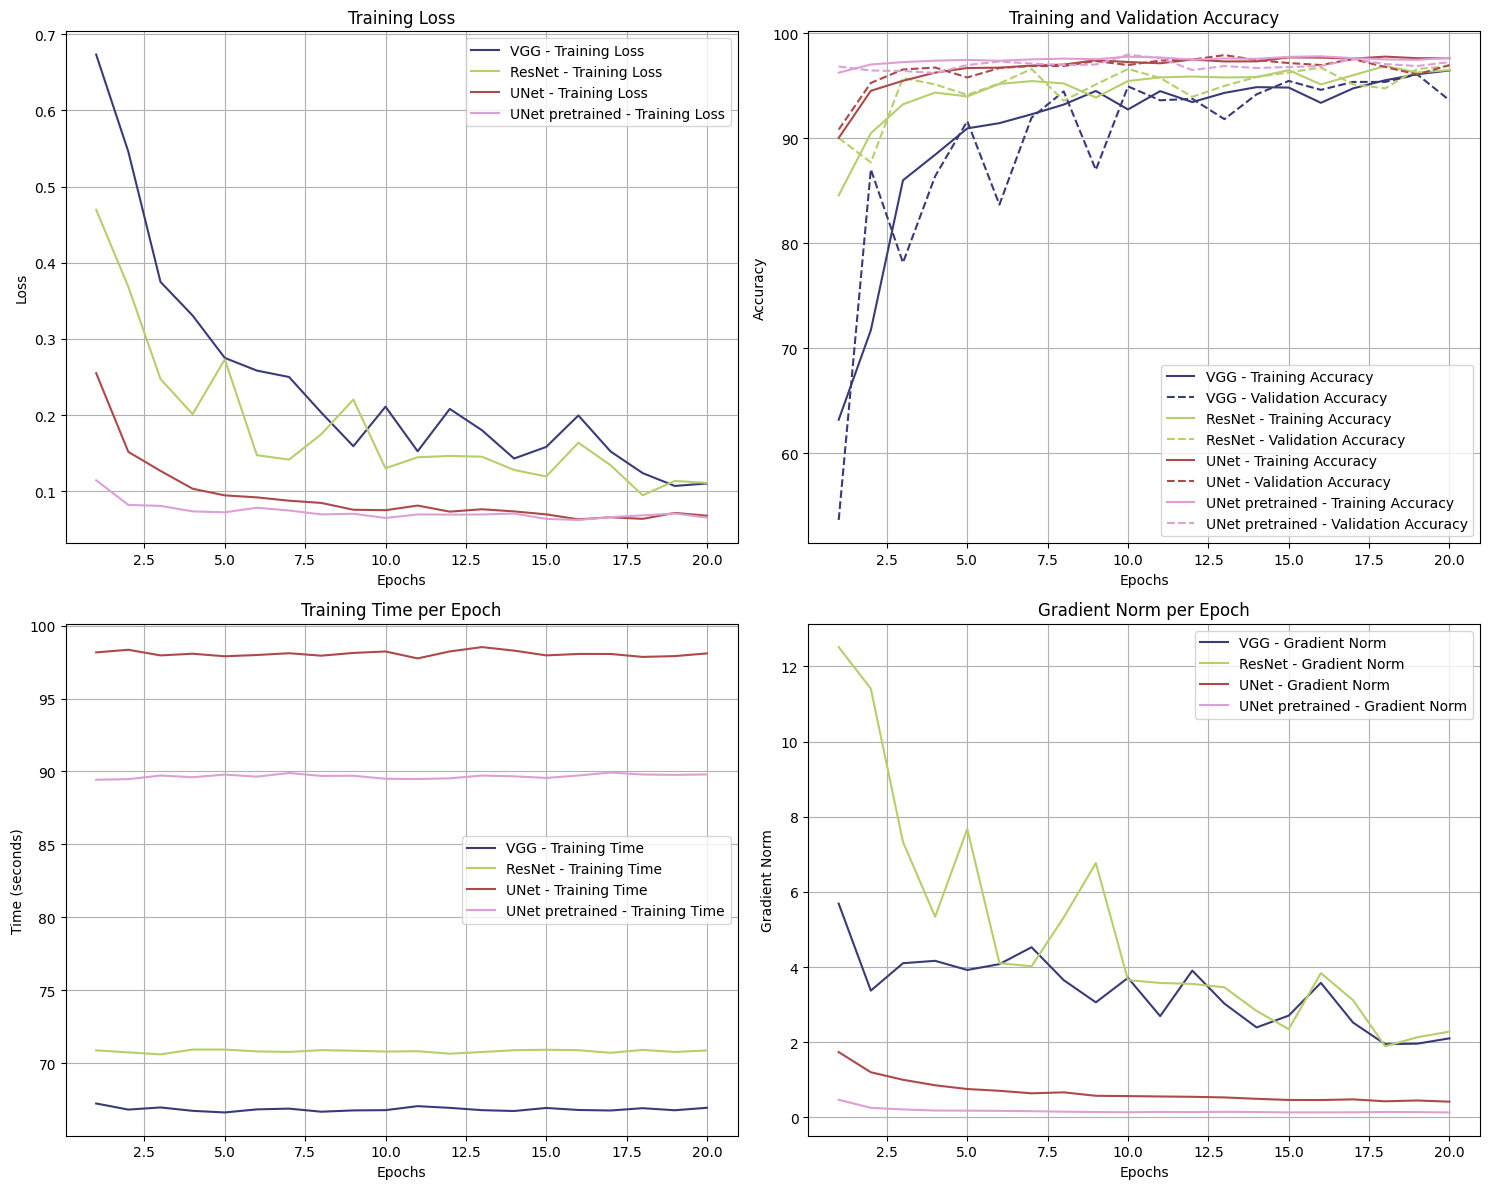

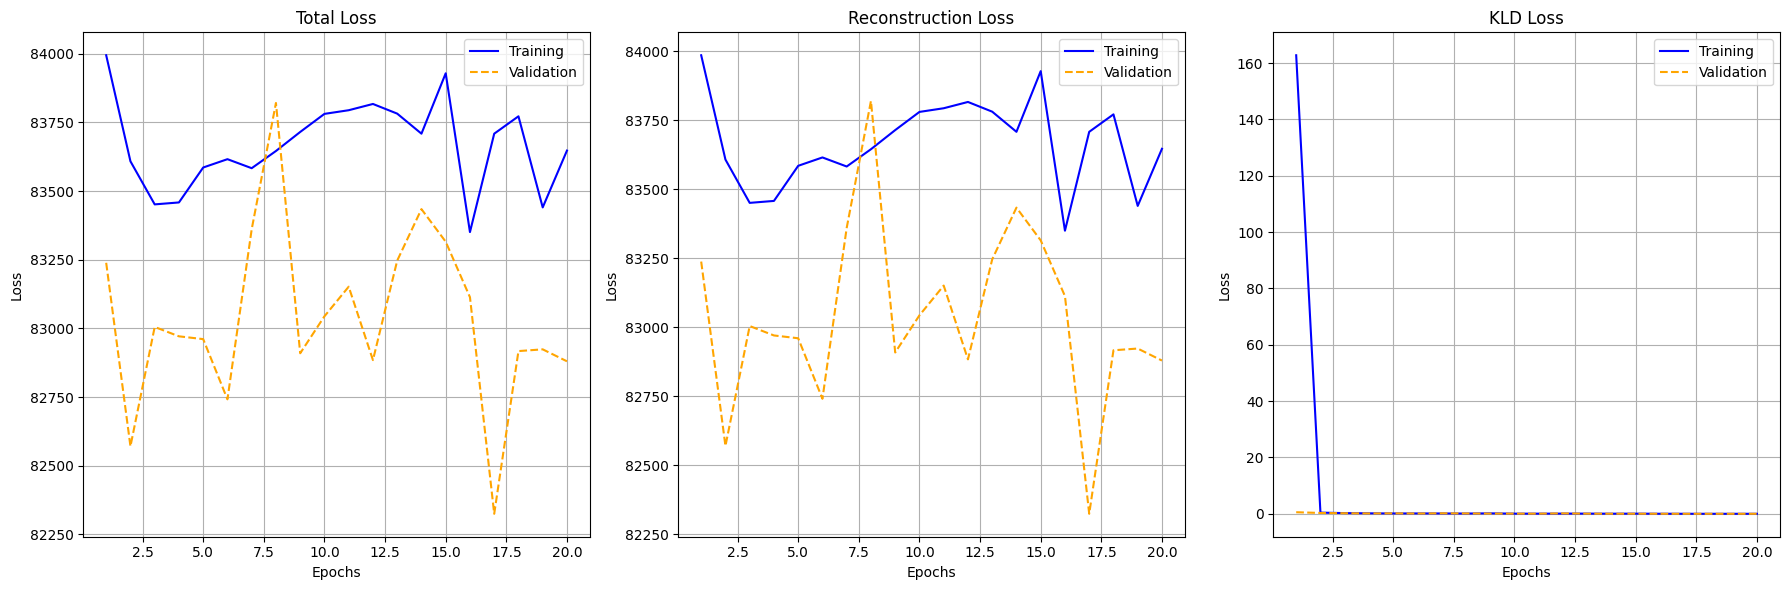

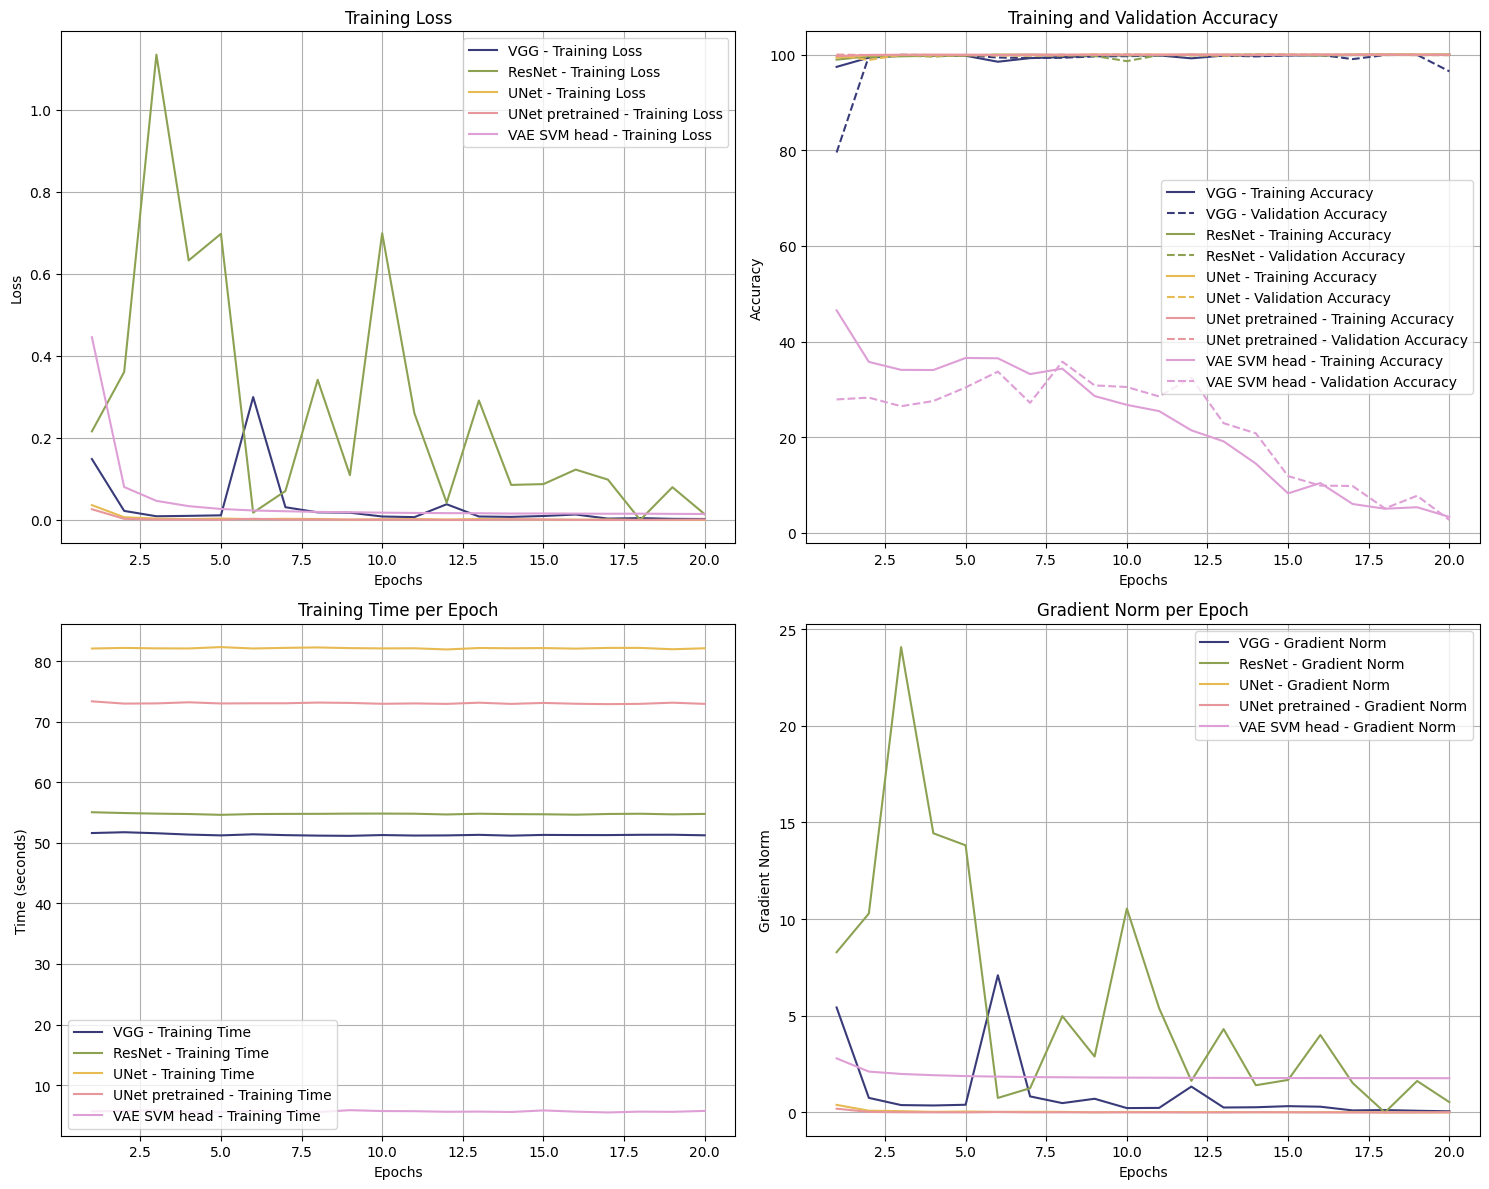

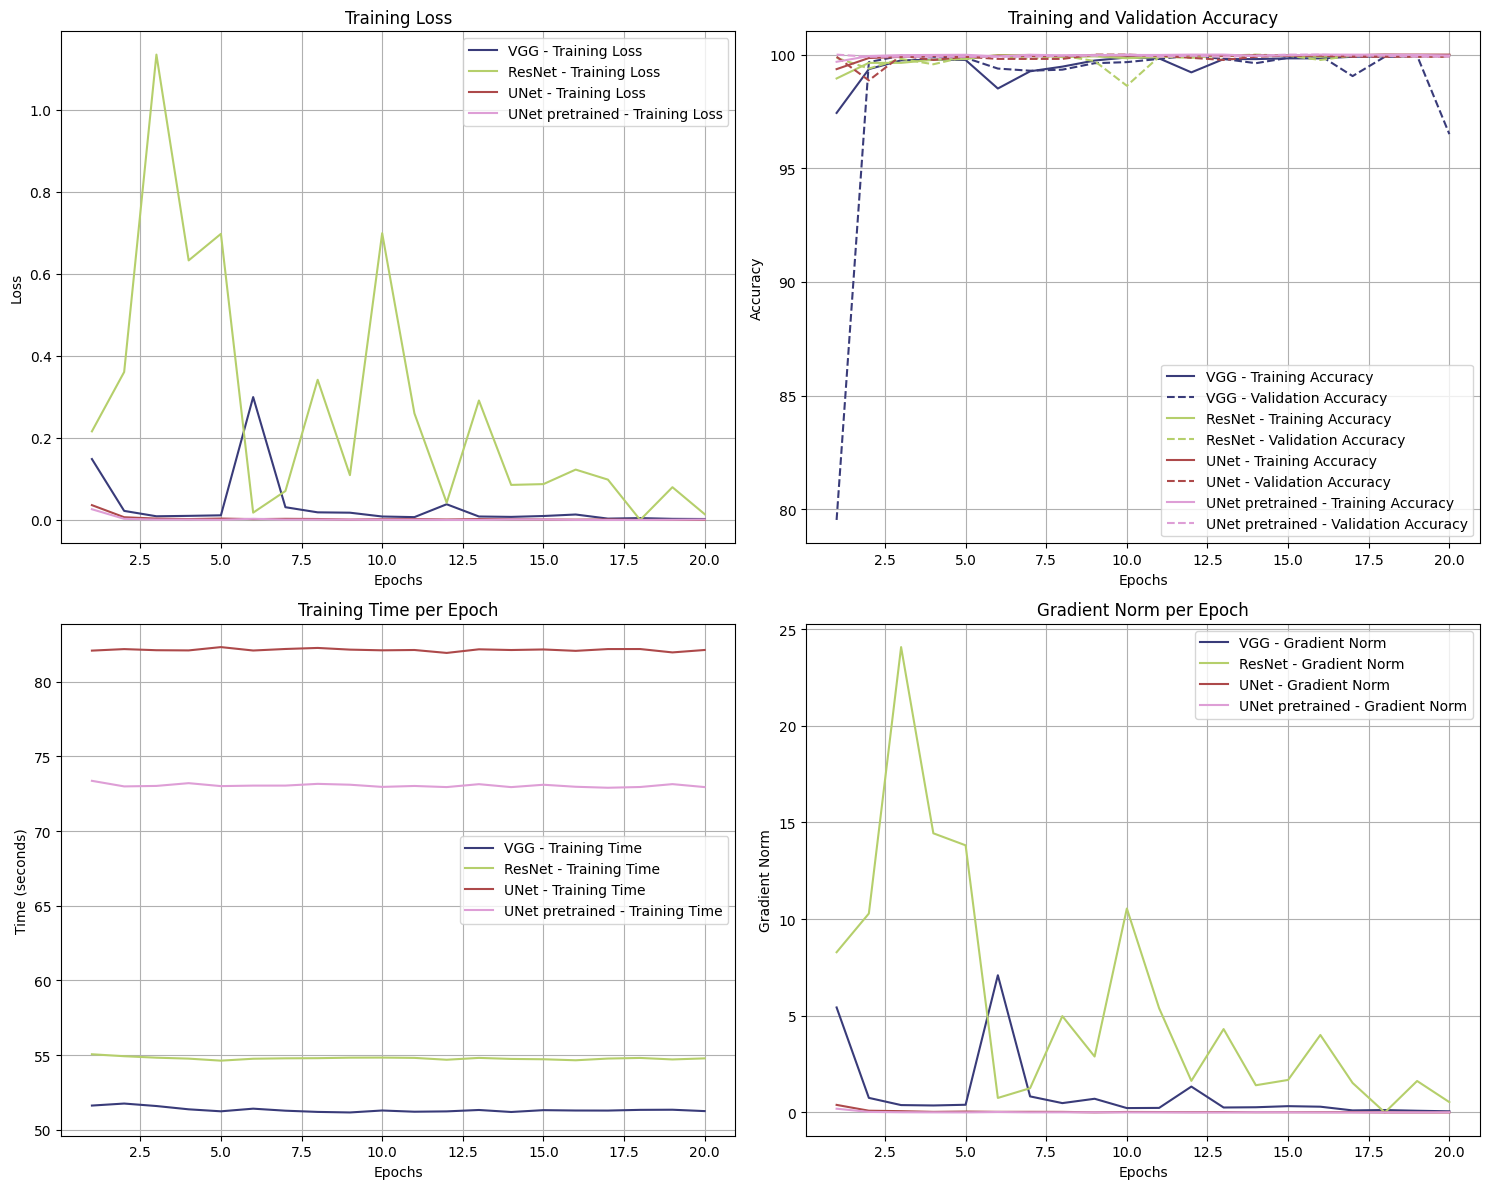

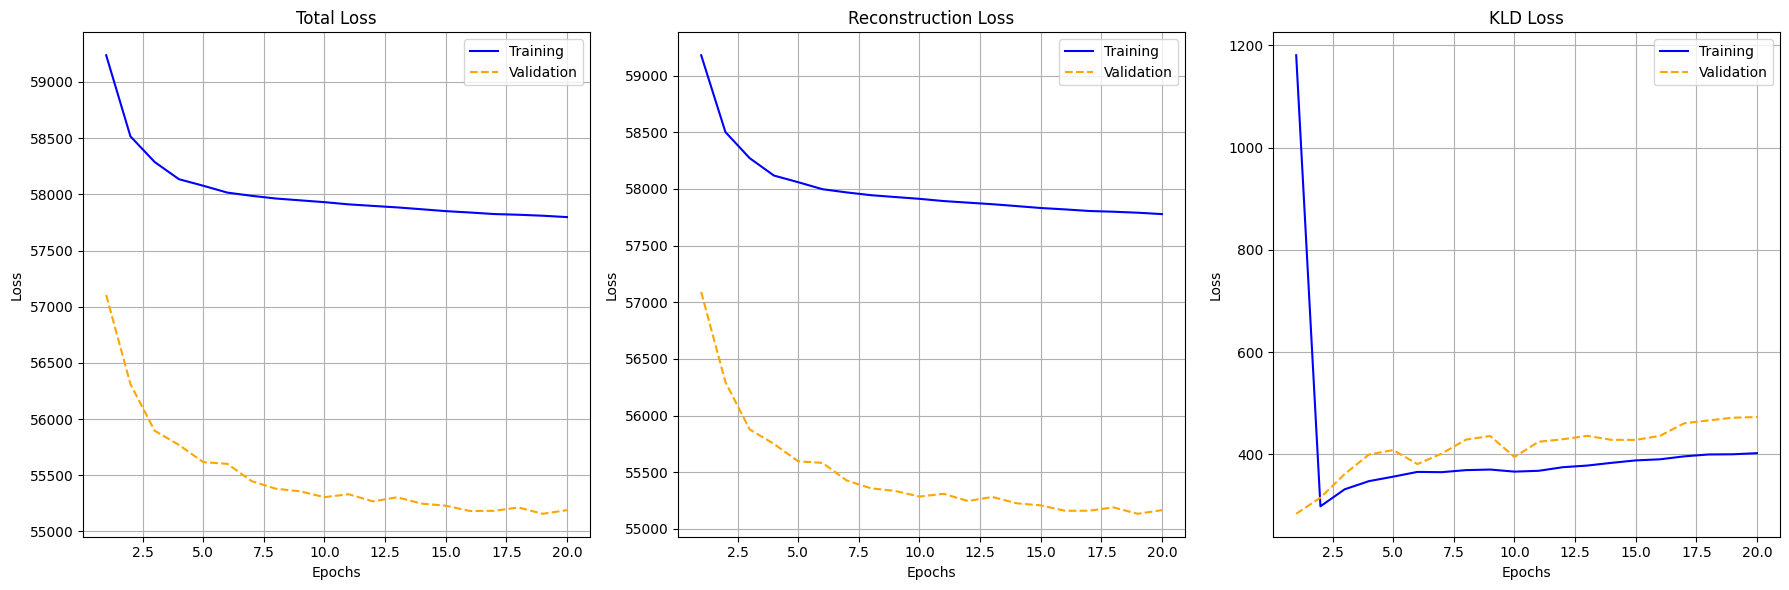

In [14]:
from ClassComp.utils.visualization import plot_training_metrics, plot_vae_training_metrics

lr = 1e-3
descriptions = ["vanilla", "class_imbalance_noisy", "class_imbalance"]
for d in descriptions:
    
    vgg_res = get_dict(common_path + f"VGG_{epochs}_epochs_{lr}_lr_{d}.pkl")
    vgg_res["name"] = "VGG"
    resnet_res = get_dict(common_path + f"ResNet_{epochs}_epochs_{lr}_lr_{d}.pkl")
    resnet_res["name"] = "ResNet"
    unet_res_no_pretraining = get_dict(common_path + f"UNet_{epochs}_epochs_{lr}_lr_{d}no_pretraining.pkl")
    unet_res_no_pretraining["name"] = "UNet"
    unet_res_pretrained = get_dict(common_path + f"UNet_{epochs}_epochs_{lr}_lr_{d}_pretrained_resnet.pkl")
    unet_res_pretrained["name"] = "UNet pretrained"
    svm_res = get_dict(common_path + f"VAE_{epochs}_epochs_{lr}_lr_{d}.pkl")
    svm_res["name"] = "VAE SVM head"
    vae_gen_res = get_dict(common_path + f"VAE_{epochs}_epochs_{lr}_lr_{d}_generation.pkl")

    plot_training_metrics([vgg_res, resnet_res, unet_res_no_pretraining, unet_res_pretrained, svm_res], f"all_{d}")
    plot_training_metrics([vgg_res, resnet_res, unet_res_no_pretraining, unet_res_pretrained], f"cnn_{d}")
    plot_vae_training_metrics(vae_gen_res, f"vae_{d}")





### Feature Spaces

/tmp/ipykernel_818804/1731914647.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg.load_state_dict(torch.load(vgg_path))


Visualizing filters of the first convolutional layer:


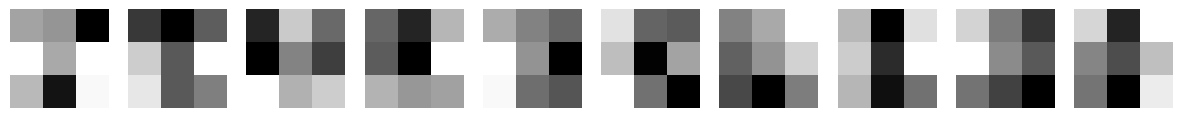

Visualizing feature maps for a sample of class '0':


/home/ymachta/miniconda3/envs/AML/lib/python3.12/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


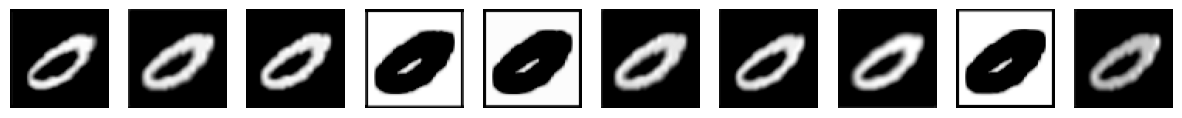

Visualizing feature maps for a sample of class '1':


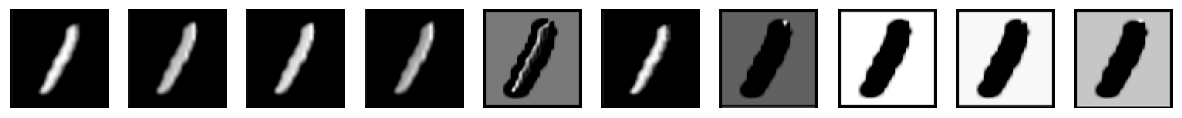

Visualizing feature maps for a sample of class '0':


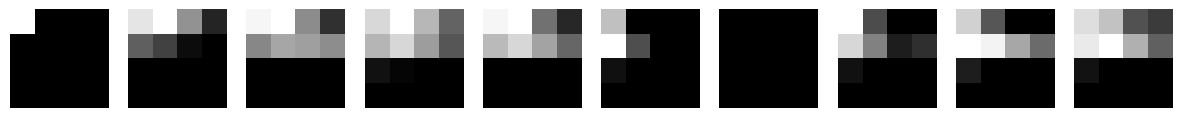

Visualizing feature maps for a sample of class '1':


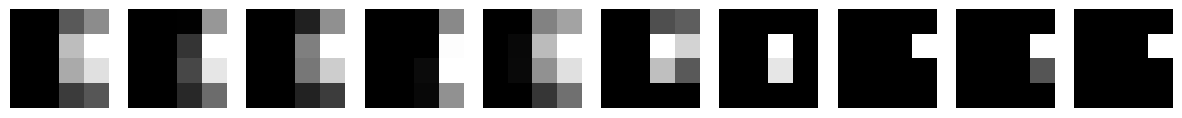

/tmp/ipykernel_818804/1731914647.py:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Visualizing filters of the first convolutional layer:


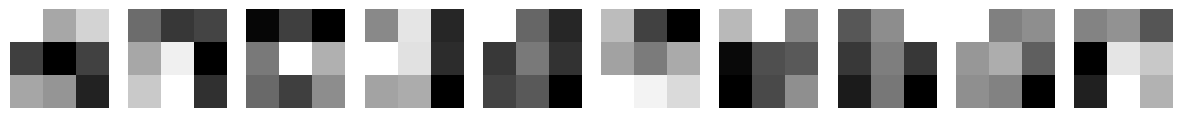

Visualizing feature maps for a sample of class '0':


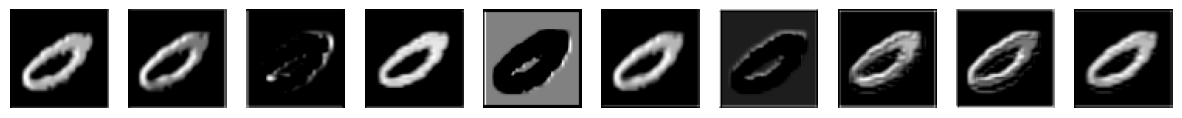

Visualizing feature maps for a sample of class '1':


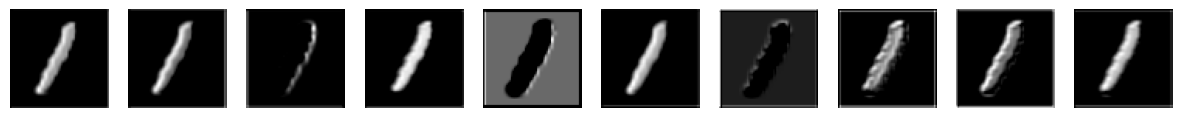

Visualizing feature maps for a sample of class '0':


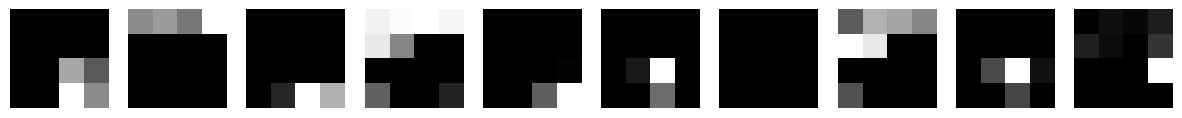

Visualizing feature maps for a sample of class '1':


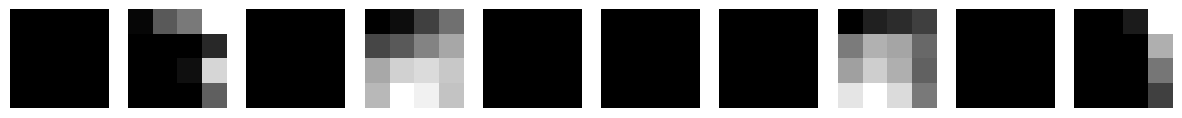

Visualizing feature maps for a sample of class '0':


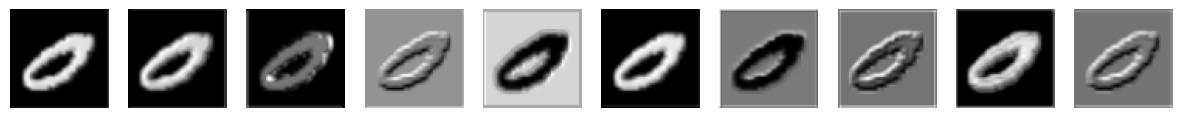

Visualizing feature maps for a sample of class '1':


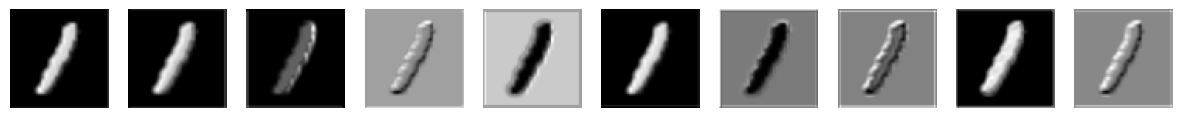

Visualizing feature maps for a sample of class '0':


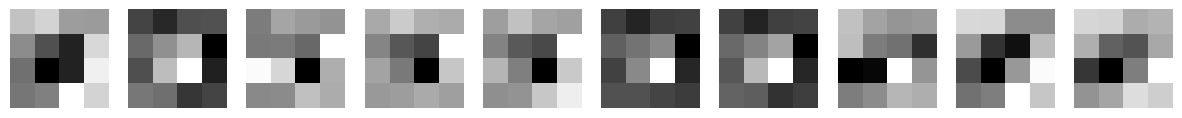

Visualizing feature maps for a sample of class '1':


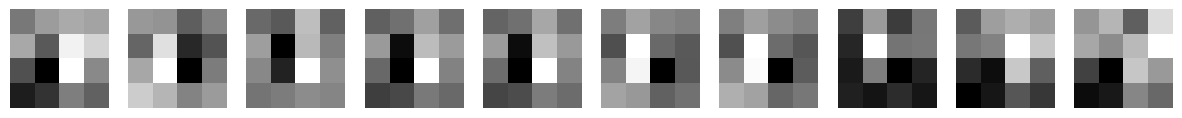

/tmp/ipykernel_818804/1731914647.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load(unet_path))


Visualizing filters of the first convolutional layer:


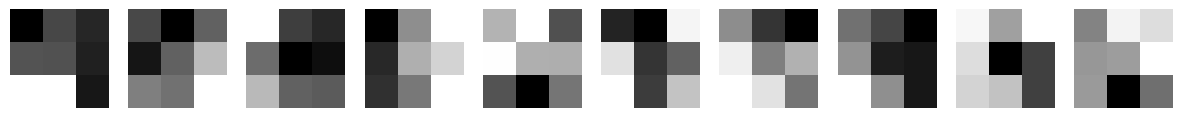

Visualizing feature maps for a sample of class '0':


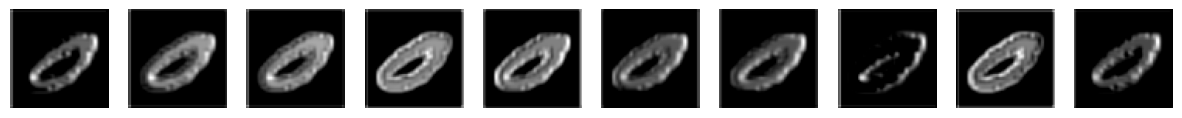

Visualizing feature maps for a sample of class '1':


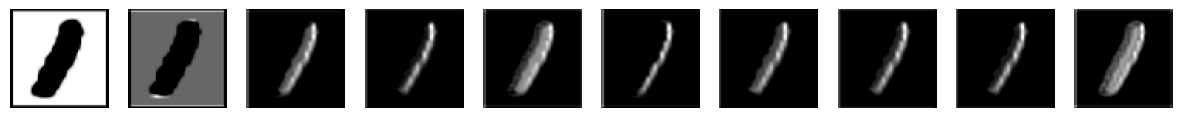

Visualizing feature maps for a sample of class '0':


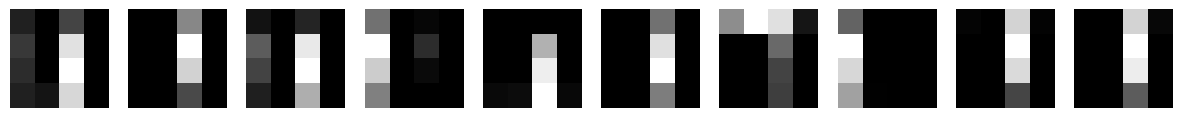

Visualizing feature maps for a sample of class '1':


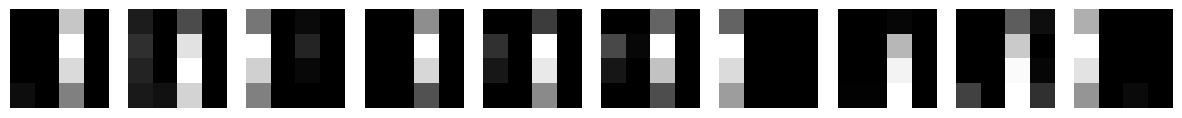

Visualizing feature maps for a sample of class '0':


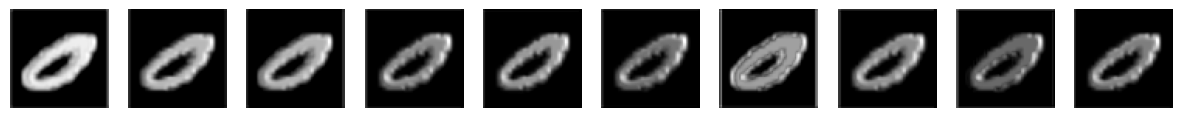

Visualizing feature maps for a sample of class '1':


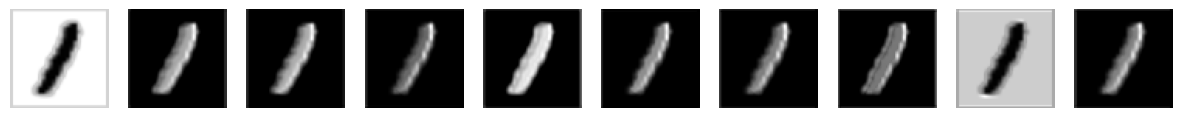

Visualizing feature maps for a sample of class '0':


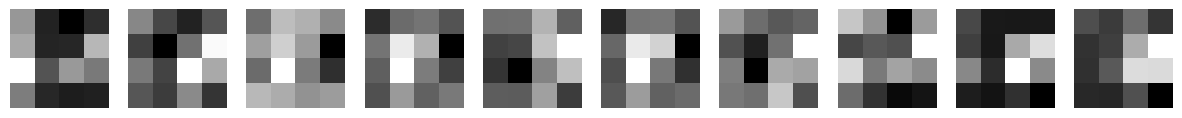

Visualizing feature maps for a sample of class '1':


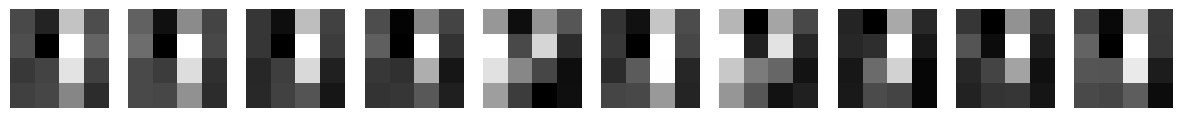

/tmp/ipykernel_818804/1731914647.py:217: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load(unet_path))


Visualizing filters of the first convolutional layer:


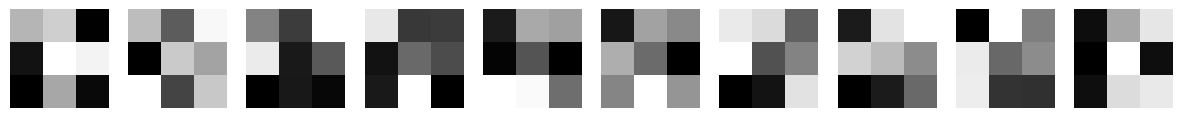

Visualizing feature maps for a sample of class '0':


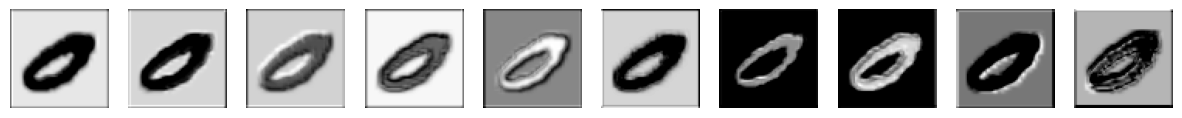

Visualizing feature maps for a sample of class '1':


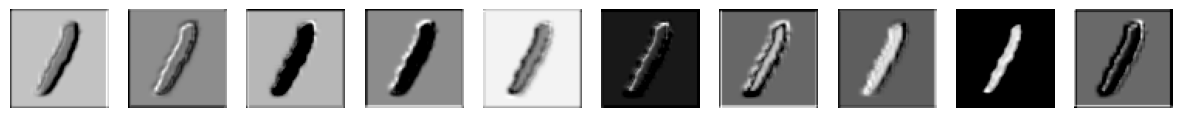

Visualizing feature maps for a sample of class '0':


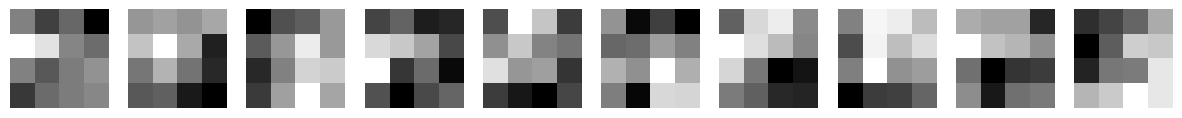

Visualizing feature maps for a sample of class '1':


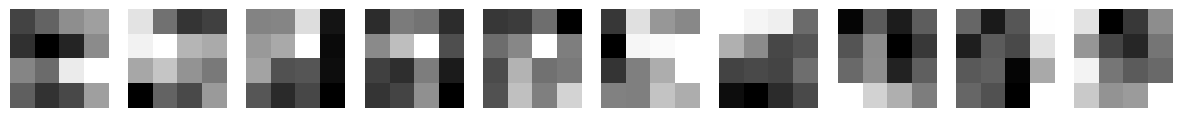

Visualizing feature maps for a sample of class '0':


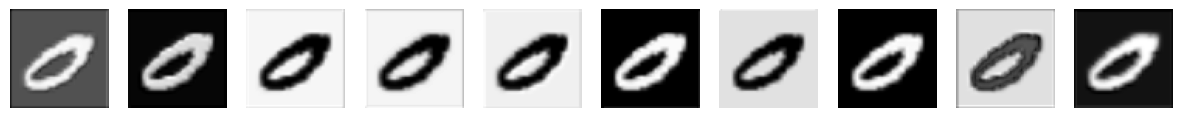

Visualizing feature maps for a sample of class '1':


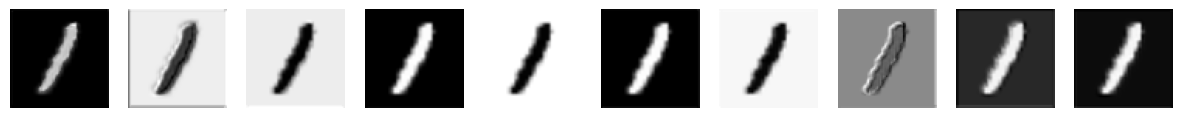

Visualizing feature maps for a sample of class '0':


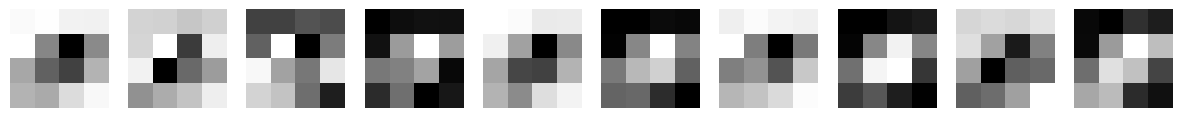

Visualizing feature maps for a sample of class '1':


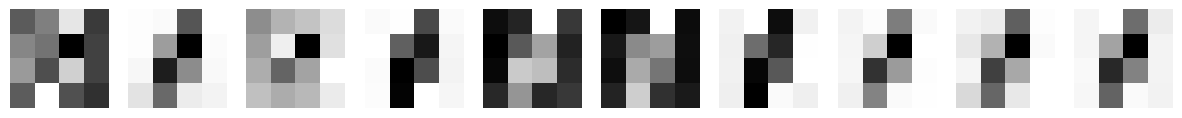

In [ ]:
import torch
from ClassComp.models.vgg import VGG
from ClassComp.models.resnet import ResNet
from ClassComp.models.unet import UNet
from ClassComp.data_utils.loaders import get_mnist, get_dataloader
import os

exp_epochs= 10

image_dir = f"{Results_folder}/image/"
os.makedirs(image_dir, exist_ok=True)

# Get binary MNIST subsets
train_subset, test_subset = get_mnist()

# Get DataLoaders with additional transformations
train_loader, test_loader = get_dataloader(train_subset, test_subset, size=64, batch_size=1)

# Select a sample from the dataset (one "0" and one "1")
class_zero_sample = None
class_one_sample = None

# Iterate over the train_loader to find one sample of each class
for images, labels in train_loader:
    if labels.item() == 0 and class_zero_sample is None:
        class_zero_sample = images
    elif labels.item() == 1 and class_one_sample is None:
        class_one_sample = images
    if class_zero_sample is not None and class_one_sample is not None:
        break

conv_layers = ["conv_block_1", "conv_block_5"]
res_conv_layers = ["res_conv_block_1", "res_conv_block_5"]
descriptions = [ "vanilla"] # ,'class_imbalance_noisy', 'class_imbalance']


for d in descriptions:
    # Load model
    vgg = VGG(64, 1)
    vgg_path = f"{Results_folder}/models/vgg_{exp_epochs}_epochs_0.001_lr_{d}.pth.tar"
    vgg.load_state_dict(torch.load(vgg_path))
    vgg.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    vgg.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"VGG_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            vgg.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"VGG_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            vgg.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"VGG_{layer}_in_{d}_setting_for_ones"
            )

    del(vgg)

    resnet = ResNet(64, 1)
    resnet_path = f"{Results_folder}/models/resnet_{exp_epochs}_epochs_0.001_lr_{d}.pth.tar"
    resnet.load_state_dict(torch.load(resnet_path))
    resnet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    resnet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"ResNet_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_ones"
            )

    del(resnet)

    unet = UNet(64)
    unet_path = f"{Results_folder}/models/unet_{exp_epochs}_epochs_0.001_lr_{d}no_pretraining.pth.tar"
    unet.load_state_dict(torch.load(unet_path))
    unet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    unet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"unet_no_pretraining_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_ones"
            )

    del(unet)

    unet = UNet(64)
    unet_path = f"{Results_folder}/models/unet_{exp_epochs}_epochs_0.001_lr_{d}_pretrained_resnet.pth.tar"
    unet.load_state_dict(torch.load(unet_path))
    unet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    unet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"unet_pretrained_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_ones"
            )


In [ ]:
descriptions = [ "class_imbalance_noisy"] 
for d in descriptions:
    # Load model
    vgg = VGG(64, 1)
    vgg_path = f"{Results_folder}/models/vgg_{exp_epochs}_epochs_0.001_lr_{d}.pth.tar"
    if not os.path.exists(vgg_path):
        print(f"Warning: {vgg_path} does not exist, skipping")
        print("Please make sure to train the model in the 'class_imbalance_noisy' setting (2nd cell)")
        continue
    vgg.load_state_dict(torch.load(vgg_path))
    vgg.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    vgg.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"VGG_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            vgg.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"VGG_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            vgg.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"VGG_{layer}_in_{d}_setting_for_ones"
            )

    del(vgg)

    resnet = ResNet(64, 1)
    resnet_path = f"{Results_folder}/models/resnet_{exp_epochs}_epochs_0.001_lr_{d}.pth.tar"
    resnet.load_state_dict(torch.load(resnet_path))
    resnet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    resnet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"ResNet_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_ones"
            )

    del(resnet)

    unet = UNet(64)
    unet_path = f"{Results_folder}/models/unet_{exp_epochs}_epochs_0.001_lr_{d}no_pretraining.pth.tar"
    unet.load_state_dict(torch.load(unet_path))
    unet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    unet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"unet_no_pretraining_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_ones"
            )

    del(unet)

    unet = UNet(64)
    unet_path = f"{Results_folder}/models/unet_{exp_epochs}_epochs_0.001_lr_{d}_pretrained_resnet.pth.tar"
    unet.load_state_dict(torch.load(unet_path))
    unet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    unet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"unet_pretrained_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_ones"
            )


In [19]:
descriptions = [ "class_imbalance"] 
for d in descriptions:
    # Load model
    vgg = VGG(64, 1)
    vgg_path = f"{Results_folder}/models/vgg_{exp_epochs}_epochs_0.001_lr_{d}.pth.tar"
    if not os.path.exists(vgg_path):
        print(f"Warning: {vgg_path} does not exist, skipping")
        print("Please make sure to train the model in the 'class_imbalance' setting (3rd cell)")
        continue
    vgg.load_state_dict(torch.load(vgg_path))
    vgg.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    vgg.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"VGG_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            vgg.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"VGG_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            vgg.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"VGG_{layer}_in_{d}_setting_for_ones"
            )

    del(vgg)

    resnet = ResNet(64, 1)
    resnet_path = f"{Results_folder}/models/resnet_{exp_epochs}_epochs_0.001_lr_{d}.pth.tar"
    resnet.load_state_dict(torch.load(resnet_path))
    resnet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    resnet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"ResNet_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            resnet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"ResNet_{layer}_in_{d}_setting_for_ones"
            )

    del(resnet)

    unet = UNet(64)
    unet_path = f"{Results_folder}/models/unet_{exp_epochs}_epochs_0.001_lr_{d}no_pretraining.pth.tar"
    unet.load_state_dict(torch.load(unet_path))
    unet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    unet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"unet_no_pretraining_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_no_pretraining_{layer}_in_{d}_setting_for_ones"
            )

    del(unet)

    unet = UNet(64)
    unet_path = f"{Results_folder}/models/unet_{exp_epochs}_epochs_0.001_lr_{d}_pretrained_resnet.pth.tar"
    unet.load_state_dict(torch.load(unet_path))
    unet.eval()


    # Visualize Filters
    print("Visualizing filters of the first convolutional layer:")
    unet.visualize_filters(
            layer_name=conv_layers[0],
            # inputs=class_zero_sample,
            num_filters=10,
            save_name=f"unet_pretrained_{conv_layers[0]}_in_{d}_setting"
        )

    for layer in conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_ones"
            )
    
    for layer in res_conv_layers:
        # Visualize Feature Maps for class "0"
        print("Visualizing feature maps for a sample of class '0':")
        if class_zero_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_zero_sample,
                num_maps=10,
                relevance_based=True,
                target_class=0,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_zeros"
            )

        # Visualize Feature Maps for class "1"
        print("Visualizing feature maps for a sample of class '1':")
        if class_one_sample is not None:
            unet.visualize_feature_maps(
                layer_name=layer,
                inputs=class_one_sample,
                num_maps=10,
                relevance_based=True,
                target_class=1,
                save_name=f"unet_pretrained_{layer}_in_{d}_setting_for_ones"
            )


Please make sure to train the model in the 'class_imbalance' setting (3rd cell)


### VAE latent space plots

/tmp/ipykernel_818804/1216334642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae.load_state_dict(torch.load(vae_path))


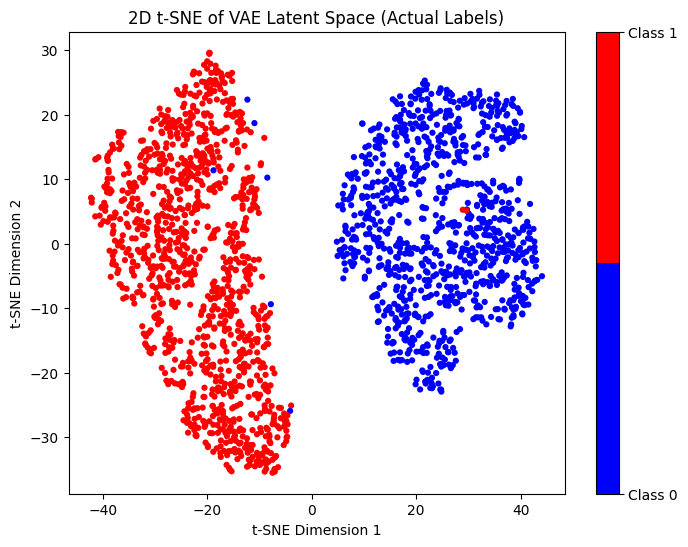

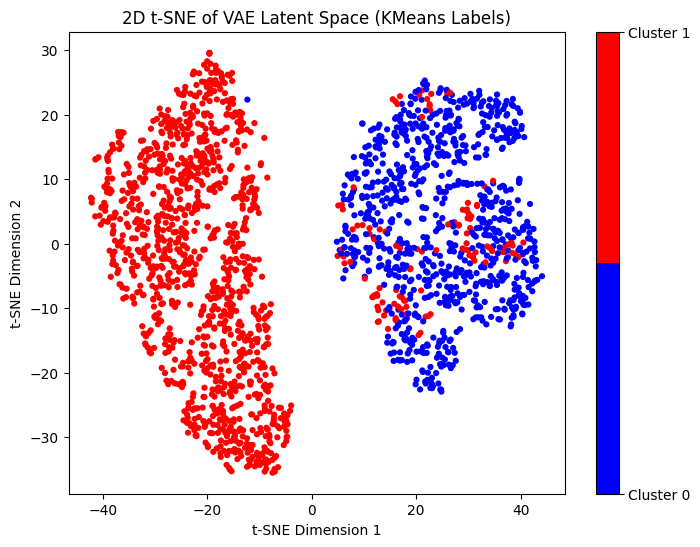

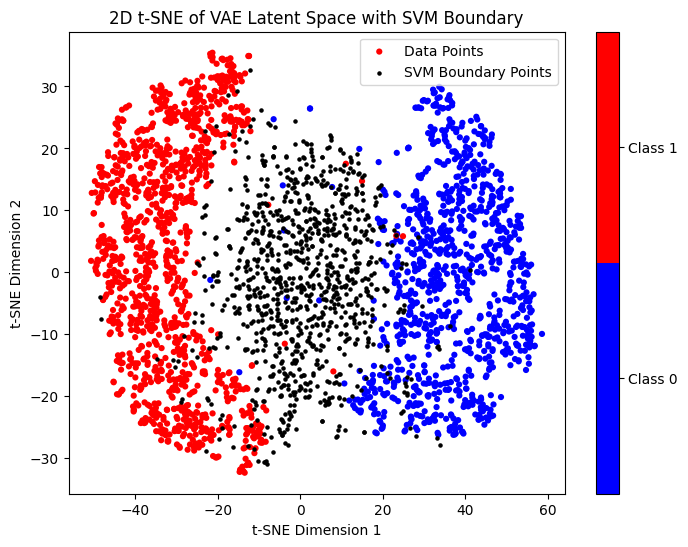

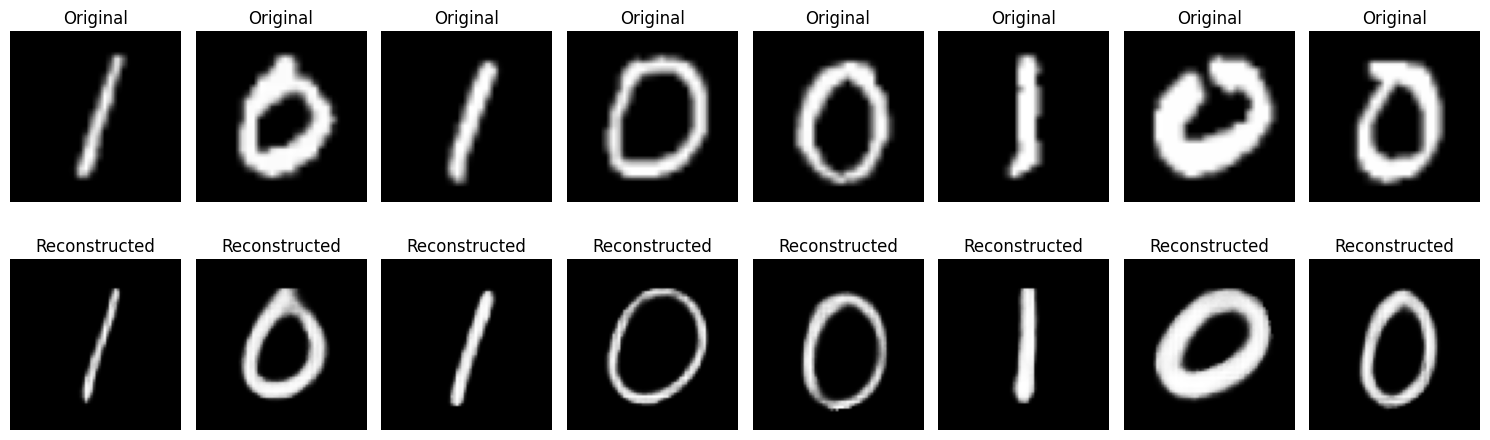

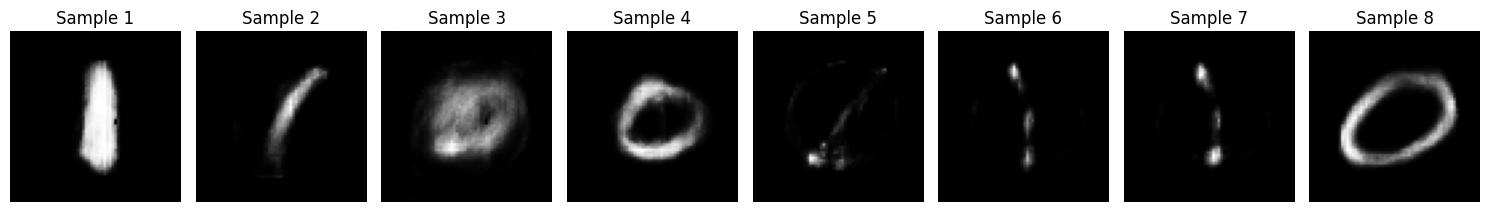

In [23]:
import pickle
from ClassComp.models.vae import VAE
from ClassComp.data_utils.loaders import get_mnist, get_dataloader
from ClassComp.utils.visualization import plot_vae_tsne_with_svm_boundary, plot_vae_outputs, plot_vae_samples, plot_vae_tsne_with_kmeans


exp_epochs = 10

# Vanilla training

image_size = 64
batch_size = 16
custom_transforms = None
epochs = 2
lr = 1e-3
beta = 0.05
descriptions = [ "vanilla"]

## Get binary MNIST subsets
train_subset, test_subset = get_mnist()

## Get DataLoaders with additional transformations
train_loader, test_loader = get_dataloader(train_subset, test_subset, transform=custom_transforms, size=image_size, batch_size=batch_size)

for d in descriptions:
    vae = VAE(image_size**2, 32*32, 8, beta=beta)
    vae_path = f"{Results_folder}/models/vae_{exp_epochs}_epochs_{lr}_lr_{d}_generation.pth.tar"
    vae.load_state_dict(torch.load(vae_path))
    vae.eval()


    vae.classification_mode = "KMeans"


    with open(f"{Results_folder}/models/VAE_{d}_kmeans.pkl", "rb") as f:
        kmeans = pickle.load(f)
        f.close()

    plot_vae_tsne_with_kmeans(
        vae, 
        test_loader, 
        kmeans,
        save_dir=f"{Results_folder}/image/{d}_",
    )
    vae.classification_mode = None
    plot_vae_tsne_with_svm_boundary(
        vae, 
        test_loader,
        save_path=f"{Results_folder}/image/vae_tsne_with_svm_{d}.jpg",
    )

    plot_vae_outputs(vae, test_loader, save_path=f"{Results_folder}/image/vae_recreated_images_{d}.jpg")

    plot_vae_samples(vae, save_path=f"{Results_folder}/image/vae_sampled_images_{d}.jpg")


In [24]:
from ClassComp.models.vae import VAE
from ClassComp.data_utils.loaders import get_mnist, get_dataloader
from ClassComp.utils.wasserstein import replicated_slice_wasserstein_generic, get_original_and_reconstructed_images

exp_epochs = 10

# Get binary MNIST subsets
train_subset, test_subset = get_mnist()

# Get DataLoaders with additional transformations
train_loader, test_loader = get_dataloader(train_subset, test_subset, size=64, batch_size=8)

model = VAE(64**2, 32**2, 8).to("cuda")
model.load_state_dict(torch.load(f"{Results_folder}/models/vae_{exp_epochs}_epochs_{lr}_lr_vanilla_generation.pth.tar", map_location="cuda"))

d = get_original_and_reconstructed_images(model, test_loader, "cuda")

print(
    f"The SWD on 0s {replicated_slice_wasserstein_generic(d['original_0'], d['reconstructed_0'], n_samples=100, n_slices=100, n_rep=10)} \n"
    f"The SWD on 1s {replicated_slice_wasserstein_generic(d['original_1'], d['reconstructed_1'], n_samples=100, n_slices=100, n_rep=10)} \n"
)


/tmp/ipykernel_818804/2118189132.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{Results_folder}/models/vae_{exp_epochs}_epochs_{lr}

The SWD on 0s 0.0753542945422788 
The SWD on 1s 0.043480346317853066 



In [25]:
print(
    f"The SWD between 0 and 1 {replicated_slice_wasserstein_generic(d['original_0'], d['original_1'], n_samples=100, n_slices=100, n_rep=10)} \n"
)

KeyboardInterrupt: 